In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import seaborn as sns

BIDS_path= "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [6]:
df_all = pd.read_csv("df_all.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS.csv", index_col=0)

In [27]:
df_all

,ch,dist_con,dist_ips,loc,r2_con,r2_ips,sess_,sub,x,y,z,b_peak,UPDRS_rigidity_upper_extrimity_contralateral,UPDRS_rigidity_upper_extrimity_ipsilateral,UPDRS_combined_akinesia_rigidty_contalateral,UPDRS_combined_akinesia_rigidty_ipsilateral,UPDRS_total
0,ECOG_RIGHT_0,23.714756,23.714756,ECOG,0.665374,0.415182,right,0,37.318174,-48.610127,61.797655,3.004269,1,1,6.0,7,28
1,ECOG_RIGHT_1,12.718657,12.718657,ECOG,0.701001,0.427649,right,0,40.159894,-37.315930,64.311716,4.356077,1,1,6.0,7,28
2,ECOG_RIGHT_2,4.524949,4.524949,ECOG,0.549859,0.318156,right,0,40.943036,-27.217785,64.095184,3.654367,1,1,6.0,7,28
3,ECOG_RIGHT_3,8.466679,8.466679,ECOG,0.598082,0.395837,right,0,39.783955,-17.005231,63.866181,3.849308,1,1,6.0,7,28
4,ECOG_RIGHT_4,19.792789,19.792789,ECOG,0.541934,0.277476,right,0,39.688136,-5.528025,61.682543,2.562056,1,1,6.0,7,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,STN_LEFT_1,6.166394,6.166394,STN,0.000000,0.000000,left,13,-14.888300,-17.947000,-9.350200,0.000000,3,2,17.0,12,48
244,STN_LEFT_2,4.984300,4.984300,STN,0.000000,0.000000,left,13,-15.504000,-17.212900,-7.223300,0.000000,3,2,17.0,12,48
245,STN_RIGHT_0,3.085589,3.085589,STN,0.000000,0.000000,right,14,14.812955,-14.134391,-3.867494,0.000000,1,2,6.0,8,31
246,STN_RIGHT_1,4.695180,4.695180,STN,0.000000,0.004868,right,14,15.164177,-13.053698,-1.966183,0.089447,1,2,6.0,8,31


In [55]:
def plot_reg_lines(x_con = "dist_con",y_con = "r2_con",x_ips = "dist_ips",y_ips = "r2_ips",x_label = "distance to motor area",y_label = r'$R^2$'):
    plt.figure(figsize=(8,8), dpi=100)
    plt.subplot(221)
    sns.regplot(x=x_con, y=y_con, data=df_best_ECOG_CON, label="CON")
    sns.regplot(x=x_ips, y=y_ips, data=df_best_ECOG_IPS, label="IPS")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label); plt.title('ECOG best ch')
    plt.subplot(222)
    sns.regplot(x=x_con, y=y_con, data=df_best_STN_CON, label="CON")
    sns.regplot(x=x_ips, y=y_ips, data=df_best_STN_IPS, label="IPS")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label); plt.title('STN best ch')

    plt.subplot(223)
    sns.regplot(x=x_con, y=y_con, data=df_all[(df_all["loc"] == "ECOG")], label="CON")
    sns.regplot(x=x_ips, y=y_ips, data=df_all[(df_all["loc"] == "ECOG")], label="IPS")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label); plt.title('ECOG all ch')
    plt.subplot(224)
    sns.regplot(x=x_con, y=y_con, data=df_all[(df_all["loc"] == "STN")], label="CON")
    sns.regplot(x=x_ips, y=y_ips, data=df_all[(df_all["loc"] == "STN")], label="IPS")
    plt.legend()
    plt.ylabel(y_label)
    plt.xlabel(x_label); plt.title('STN all ch')
    plt.tight_layout()

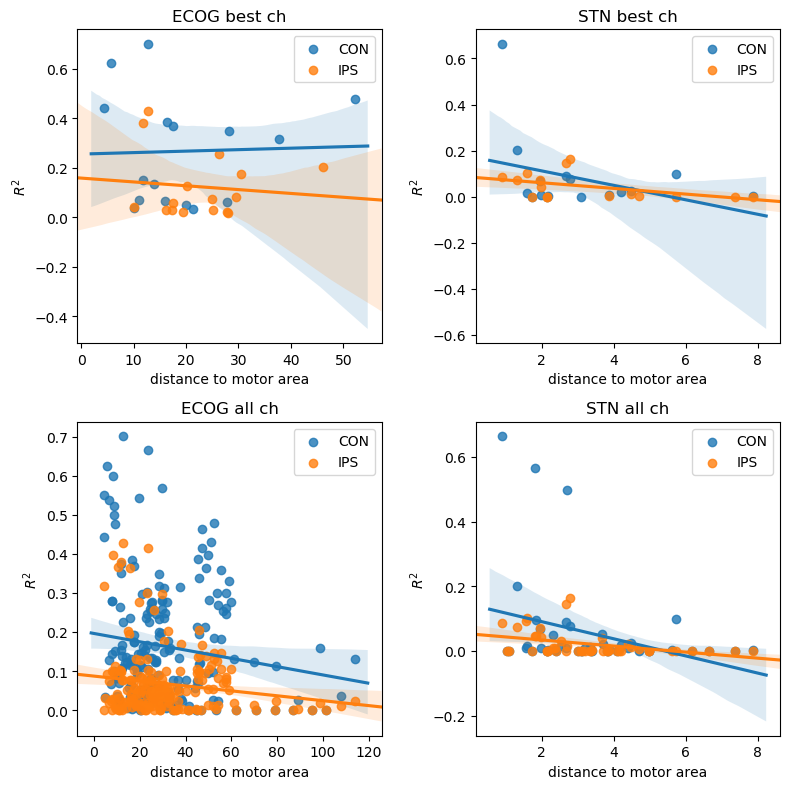

In [56]:
plot_reg_lines(x_con = "dist_con",y_con = "r2_con",x_ips = "dist_ips",y_ips = "r2_ips",
               x_label = "distance to motor area",y_label = r'$R^2$')

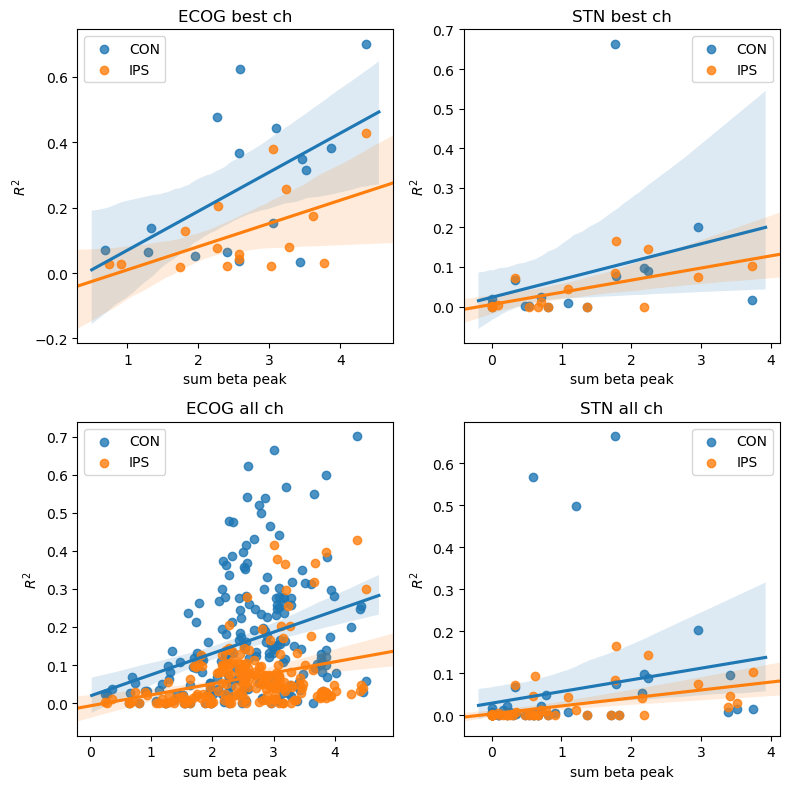

In [58]:
plot_reg_lines(x_con = "b_peak",y_con = "r2_con",x_ips = "b_peak",y_ips = "r2_ips",
               x_label = "sum beta peak",y_label = r'$R^2$')

In [59]:
df_all.keys()

Index(['ch', 'dist_con', 'dist_ips', 'loc', 'r2_con', 'r2_ips', 'sess_', 'sub',
       'x', 'y', 'z', 'b_peak', 'UPDRS_rigidity_upper_extrimity_contralateral',
       'UPDRS_rigidity_upper_extrimity_ipsilateral',
       'UPDRS_combined_akinesia_rigidty_contalateral',
       'UPDRS_combined_akinesia_rigidty_ipsilateral', 'UPDRS_total'],
      dtype='object')

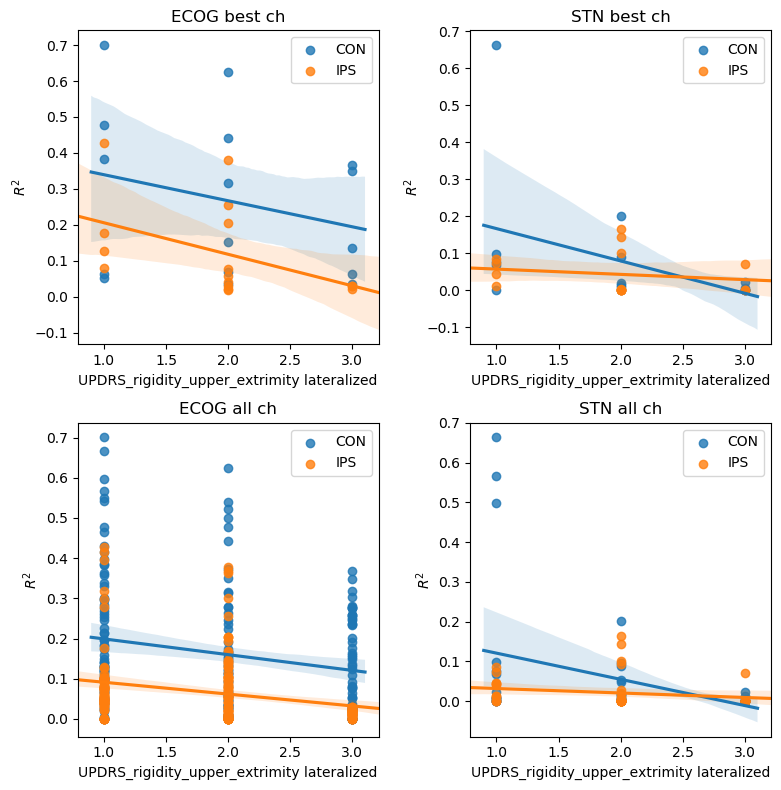

In [64]:
plot_reg_lines(x_con = "UPDRS_rigidity_upper_extrimity_contralateral",
               y_con = "r2_con",x_ips = "UPDRS_rigidity_upper_extrimity_ipsilateral",
               y_ips = "r2_ips",
               x_label = "UPDRS_rigidity_upper_extrimity lateralized",y_label = r'$R^2$')

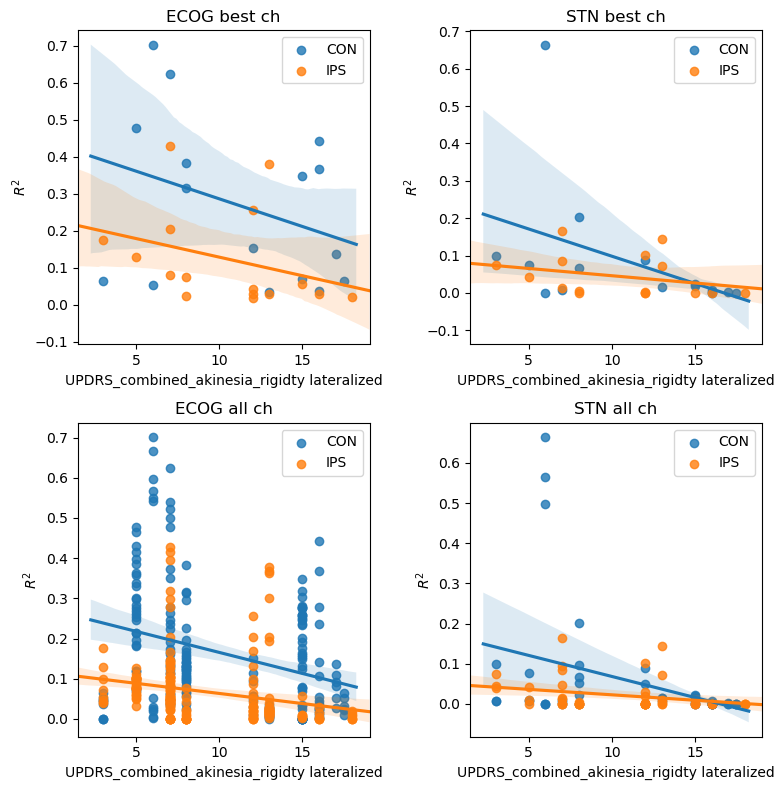

In [65]:
plot_reg_lines(x_con = "UPDRS_combined_akinesia_rigidty_contalateral",
               y_con = "r2_con",x_ips = "UPDRS_combined_akinesia_rigidty_ipsilateral",
               y_ips = "r2_ips",
               x_label = "UPDRS_combined_akinesia_rigidty lateralized",y_label = r'$R^2$')

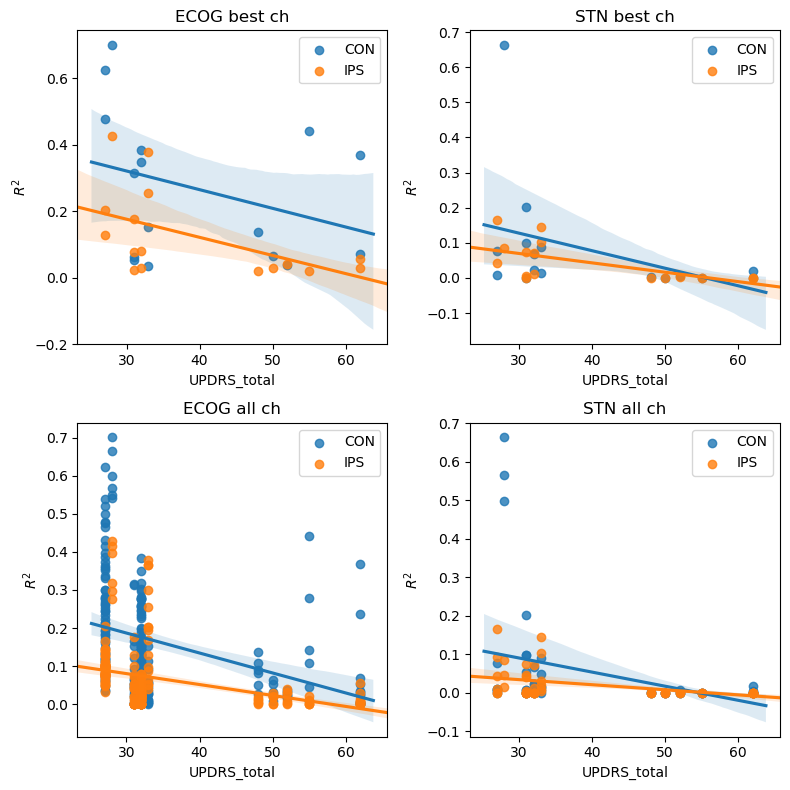

In [66]:
plot_reg_lines(x_con = "UPDRS_total",
               y_con = "r2_con",x_ips = "UPDRS_total",
               y_ips = "r2_ips",
               x_label = "UPDRS_total",y_label = r'$R^2$')